In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from scipy.interpolate import splrep, BSpline
from scipy import interpolate

In [35]:
x = np.sort((1-np.random.beta(2,2,100))*5)
y_true = 3*x**2  - x**2*np.sin(2*x) + 10
y = 3*x**2  - x**2*np.sin(2*x)+ np.random.normal(0,5,len(x)) + 10
comb = np.array([x,y])

Text(0, 0.5, 'Y - Response')

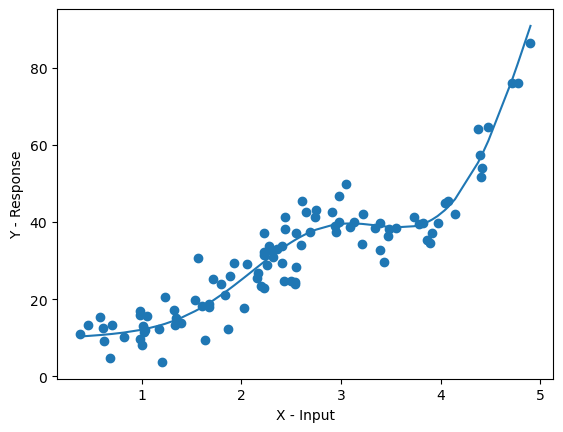

In [36]:
plt.scatter(x,y)
plt.plot(x,y_true)
plt.xlabel('X - Input')
plt.ylabel('Y - Response')

In [43]:
##K-Fold
tune_set = np.logspace(0,5,10)
MSE_list = np.zeros(len(tune_set))

for iteration, value in enumerate(tune_set):
    MSE = 0
    for z in range(10):
        CV_index = np.arange(100)
        np.random.shuffle(CV_index)
        
        for i in range(10):

            test_index = CV_index[i*10:i*10+10]
            train_index = CV_index[~np.isin(CV_index,test_index)]

            train_x, train_y = comb.T[train_index[train_index.argsort()]].T
            test_x, test_y = comb.T[test_index[test_index.argsort()]].T

            tck = interpolate.splrep(train_x,train_y, s = value, k=5)

            pred = interpolate.splev(test_x, tck, der = 0)
            error = np.sum(test_y - pred)**2
            MSE += np.sum(test_y - pred)**2

    MSE_list[iteration] = MSE/100

In [45]:
opt_s = tune_set[np.where(MSE_list == np.min(MSE_list))[0]]
tck = interpolate.splrep(x,y, k=5, s = opt_s)

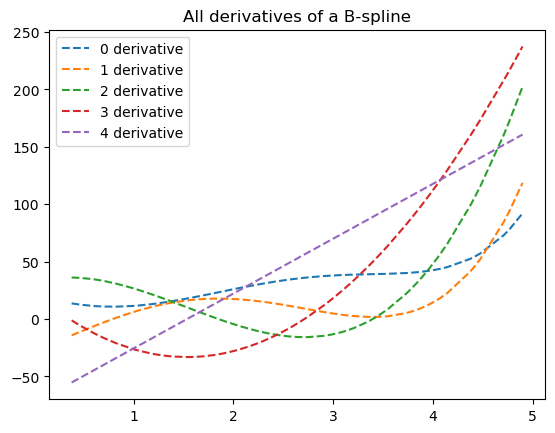

In [46]:
yders = interpolate.spalde(x, tck)
plt.figure()
for i in range(5):
    plt.plot(x, [d[i] for d in yders], '--', label=f"{i} derivative")
plt.legend()
plt.title('All derivatives of a B-spline')
plt.show()


In [9]:
uniform_index = np.random.choice(np.arange(100), 80, replace = False)
sample_x, sample_y = comb.T[uniform_index].T

dv1 = np.append(x[1], x[:len(x)-1])
dv2 = np.append(x[1:], x[len(x)-2])

distances = np.abs(x-dv1)+ np.abs(x-dv2)
distances = 1/distances

weights = (distances)/np.sum(distances)

weighted_index = np.random.choice(np.arange(100), 80, replace = False, p = weights)
sample_xW, sample_yW = comb.T[weighted_index ].T

In [10]:
deriv_preds = np.array(yders).T[1]

deriv = 6*x -(2*x**2)*np.cos(2*x) - 2*x*np.sin(2*x)

In [11]:
iters = 1000
MSE_uniform = np.zeros(iters)
MSE_weighted = np.zeros(iters)

sumWeightSim = np.zeros(iters)
sumUnifSim = np.zeros(iters)

for i in range(iters):
    uniform_index = np.random.choice(np.arange(100), 80, replace = False)
    weighted_index = np.random.choice(np.arange(100), 80, replace = False, p = weights)

    MSE_uniform[i] = np.mean((deriv[uniform_index] - deriv_preds[uniform_index])**2)
    MSE_weighted[i] = np.mean((deriv[weighted_index] - deriv_preds[weighted_index])**2)
    

    similarity_uniform = np.zeros((80,80))
    similarity_weighted = np.zeros((80,80))
    for j in range(80):
        for z in range(80):
            point1U = np.array([x[uniform_index[j]], deriv_preds[uniform_index[j]]])
            otherU = np.array([x[uniform_index[z]], deriv_preds[uniform_index[z]]])
            similarityU = np.inner(point1U, otherU)/(np.linalg.norm(point1U)*np.linalg.norm(otherU))
            similarity_uniform[z,j] = similarityU

            point1W = np.array([x[weighted_index[j]], deriv_preds[weighted_index[j]]])
            otherW = np.array([x[weighted_index[z]], deriv_preds[weighted_index[z]]])
            similarityW = np.inner(point1W, otherW)/(np.linalg.norm(point1W)*np.linalg.norm(otherW))
            similarity_weighted[z,j] = similarityW
        
    sumWeightSim[i] = np.sum(similarity_weighted)
    sumUnifSim[i] = np.sum(similarity_uniform)
    

In [13]:
print(f'Similarity uniform: {np.mean(sumUnifSim)} and SD {np.sqrt(np.var(sumUnifSim)/iters)}')
print(f'Similarity weighted: {np.mean(sumWeightSim)} and SD {np.sqrt(np.var(sumWeightSim)/iters)}')

Similarity uniform: 3602.4256030596757 and SD 8.036699088265639
Similarity weighted: 3902.625521929034 and SD 8.303492982569072


In [14]:
print(f'MSE_uniform: {np.mean(MSE_uniform)} with SD: {np.sqrt(np.var(MSE_uniform)/iters)}')
print(f'MSE_weighted: {np.mean(MSE_weighted)} with SD: {np.sqrt(np.var(MSE_weighted)/iters)}')

MSE_uniform: 14.853829636774003 with SD: 0.08275827655857962
MSE_weighted: 10.563739098464492 with SD: 0.08419570243392654


   # Mexican Hat Function

In [21]:
x = 2*np.pi*(np.sort(np.append(np.random.beta(2,2,50), -1+np.random.beta(2,2,50))))
y = (1-x**2)*np.exp(-0.5*x**2) + np.random.normal(0,0.2**2,100)

x_graph = 2*np.pi*np.linspace(-1,1,200)
y_graph = (1-x_graph**2)*np.exp(-0.5*x_graph**2)
y_true = (1-x**2)*np.exp(-0.5*x**2)

comb = np.array([x,y])

Text(0, 0.5, 'Y - Input')

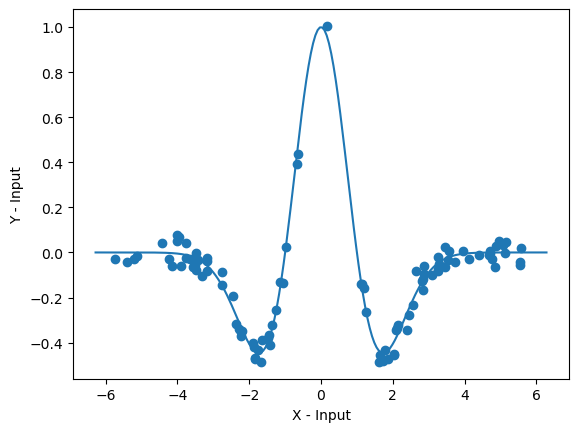

In [33]:
plt.scatter(x,y)
plt.plot(x_graph, y_graph)
plt.xlabel("X - Input")
plt.ylabel("Y - Input")

In [24]:
##K-Fold
tune_set = np.logspace(-3,0,8)
MSE_list = np.zeros(len(tune_set))

for iteration, value in enumerate(tune_set):
    MSE = 0
    for z in range(10):
        CV_index = np.arange(100)
        np.random.shuffle(CV_index)
        
        for i in range(10):

            test_index = CV_index[i*10:i*10+10]
            train_index = CV_index[~np.isin(CV_index,test_index)]

            train_x, train_y = comb.T[train_index[train_index.argsort()]].T
            test_x, test_y = comb.T[test_index[test_index.argsort()]].T

            tck = interpolate.splrep(train_x,train_y, s = value)

            pred = interpolate.splev(test_x, tck, der = 0)
            error = np.sum(test_y - pred)**2
            MSE += np.sum(test_y - pred)**2

    MSE_list[iteration] = MSE/100


In [25]:
opt_s = tune_set[np.where(MSE_list == np.min(MSE_list))[0]]

In [27]:
tck = interpolate.splrep(x,y, s = opt_s[0])

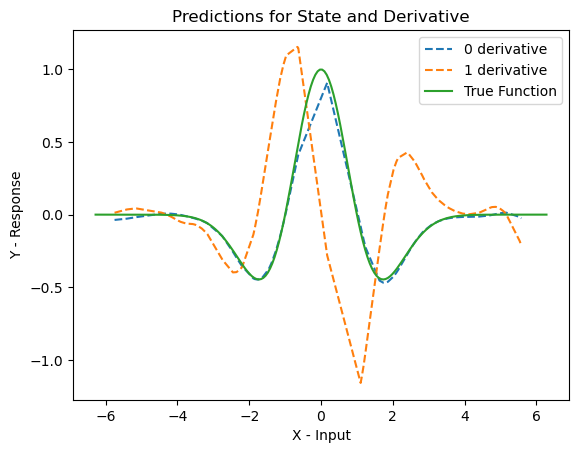

In [29]:
yders = interpolate.spalde(x, tck)
plt.figure()
for i in range(2):
    plt.plot(x, [d[i] for d in yders], '--', label=f"{i} derivative")
plt.plot(x_graph, y_graph, label = "True Function")
plt.legend()
plt.title('Predictions for State and Derivative')
plt.xlabel('X - Input')
plt.ylabel('Y - Response')
plt.show()


In [13]:
uniform_index = np.random.choice(np.arange(100), 80, replace = False)
sample_x, sample_y = comb.T[uniform_index].T

dv1 = np.append(x[1], x[:len(x)-1])
dv2 = np.append(x[1:], x[len(x)-2])

distances = np.abs(x-dv1)+ np.abs(x-dv2)
distances = 1/distances

weights = (distances)/np.sum(distances)

weighted_index = np.random.choice(np.arange(100), 80, replace = False, p = weights)
sample_xW, sample_yW = comb.T[weighted_index ].T

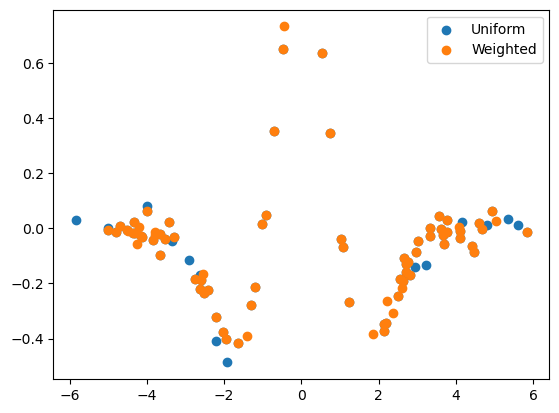

In [19]:
plt.scatter(sample_x, sample_y)
plt.scatter(sample_xW, sample_yW)
plt.legend(['Uniform', 'Weighted'])

In [20]:
deriv_preds = np.array(yders).T[1]

In [21]:
deriv = (x**3 - 3*x)*np.exp(-1/2*x**2)

In [58]:
iters = 1000
MSE_uniform = np.zeros(iters)
MSE_weighted = np.zeros(iters)

sumWeightSim = np.zeros(iters)
sumUnifSim = np.zeros(iters)

for i in range(iters):
    uniform_index = np.random.choice(np.arange(100), 80, replace = False)
    weighted_index = np.random.choice(np.arange(100), 80, replace = False, p = weights)

    MSE_uniform[i] = np.mean((deriv[uniform_index] - deriv_preds[uniform_index])**2)
    MSE_weighted[i] = np.mean((deriv[weighted_index] - deriv_preds[weighted_index])**2)
    

    similarity_uniform = np.zeros((80,80))
    similarity_weighted = np.zeros((80,80))
    for j in range(80):
        for z in range(80):
            point1U = np.array([x[uniform_index[j]], deriv_preds[uniform_index[j]]])
            otherU = np.array([x[uniform_index[z]], deriv_preds[uniform_index[z]]])
            similarityU = np.inner(point1U, otherU)/(np.linalg.norm(point1U)*np.linalg.norm(otherU))
            similarity_uniform[z,j] = similarityU

            point1W = np.array([x[weighted_index[j]], deriv_preds[weighted_index[j]]])
            otherW = np.array([x[weighted_index[z]], deriv_preds[weighted_index[z]]])
            similarityW = np.inner(point1W, otherW)/(np.linalg.norm(point1W)*np.linalg.norm(otherW))
            similarity_weighted[z,j] = similarityW
        
    sumWeightSim[i] = np.sum(similarity_weighted)
    sumUnifSim[i] = np.sum(similarity_uniform)

In [64]:
print(f'MSE_uniform: {np.mean(MSE_uniform)} with SD: {np.sqrt(np.var(MSE_uniform)/iters)}')
print(f'MSE_weighted: {np.mean(MSE_weighted)} with SD: {np.sqrt(np.var(MSE_weighted)/iters)}')

MSE_uniform: 323.79826504460544 with SD: 1.0016812890369466
MSE_weighted: 317.67430242523335 with SD: 0.9617021303439787


In [60]:
print(f'Similarity uniform: {np.mean(sumUnifSim)}')
print(f'Similarity weighted: {np.mean(sumWeightSim)}')

Similarity uniform: 2311.9733479845795
Similarity weighted: 2350.631618343388


In [61]:
np.sqrt(np.var(sumUnifSim)/iters)

8.870279567863097

In [62]:
np.sqrt(np.var(sumWeightSim)/iters)

8.706440021668548